**Author:** Regina Hoo

**Institution:** Wellcome Sanger institute

**April, 2023**

---

##  pS2_subset pf specific droplets 
####  For malaria UMAP, I am ONLY interested in cell with reads mapping to Pf and Pf+hum transcriptome  ==> 'Pf_iv', 'Pf_b',  'Pf_nb' droplets, therefore I am removing 'hs' category droplets as they are all purely human cells 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/EXP/preprocessing/'
#sc.settings.figdir = './figures/TWO/preprocessing/'
#sc.settings.figdir = './figures/TW-Okae/preprocessing/'
#sc.settings.figdir = './figures/AO-Okae/preprocessing/'

sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0


'/opt/conda/bin/python'

In [2]:
#adata = sc.read('./output_new/EXP/pS1_preprocessed_exp_adata.h5ad')
#adata=sc.read ('./output_new/TWO/pS1_preprocessed_two_adata.h5ad')
#adata=sc.read ('./output_new/TW-Okae/pS1_preprocessed_tw-okae_adata.h5ad')
#adata=sc.read ('./output_new/AO-Okae/pS1_preprocessed_ao-okae_adata.h5ad')
adata = sc.read('./output/rna1_counts_Pf_adata.h5ad')
adata.X.shape

(311414, 32887)

In [3]:
adata.obs['stage_1']

Pla_HDBR11345021_AAACCCAAGCCTGACC    pf_iv
Pla_HDBR11345021_AAACCCAAGCGATGCA    pf_iv
Pla_HDBR11345021_AAACCCAAGCGTGCCT    pf_iv
Pla_HDBR11345021_AAACCCAAGCTGTGCC    pf_iv
Pla_HDBR11345021_AAACCCAAGGCACGAT    pf_iv
                                     ...  
Pla_HDBR13007973_TTTGTTGGTTTCGATG     pf_b
Pla_HDBR13007973_TTTGTTGTCCAGCTCT     pf_b
Pla_HDBR13007973_TTTGTTGTCGCCAACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTAGTACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTCGAGTA     pf_b
Name: stage_1, Length: 311414, dtype: category
Categories (4, object): ['hs', 'pf_b', 'pf_iv', 'pf_nb']

In [4]:
#adata = adata[[i in [ 'pf_b'] for i in adata.obs['stage_1'] ]]
#adata.X.shape

In [5]:
#adata.write('/lustre/scratch117/cellgen/team292/rh26/16_explant_sc_2D9_stars_combine/pf_b.h5ad')

### Removing 'hs' category droplets 

In [6]:
adata = adata[[i not in ['hs'] for i in adata.obs['stage_1']]]
adata.obs['stage_1']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Pla_HDBR11345021_AAACCCAAGCCTGACC    pf_iv
Pla_HDBR11345021_AAACCCAAGCGATGCA    pf_iv
Pla_HDBR11345021_AAACCCAAGCGTGCCT    pf_iv
Pla_HDBR11345021_AAACCCAAGCTGTGCC    pf_iv
Pla_HDBR11345021_AAACCCAAGGCACGAT    pf_iv
                                     ...  
Pla_HDBR13007973_TTTGTTGGTTTCGATG     pf_b
Pla_HDBR13007973_TTTGTTGTCCAGCTCT     pf_b
Pla_HDBR13007973_TTTGTTGTCGCCAACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTAGTACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTCGAGTA     pf_b
Name: stage_1, Length: 291281, dtype: category
Categories (3, object): ['pf_b', 'pf_iv', 'pf_nb']

In [7]:
adata.X.shape

(291281, 32887)

In [8]:
adata.obs['stage_1']

Pla_HDBR11345021_AAACCCAAGCCTGACC    pf_iv
Pla_HDBR11345021_AAACCCAAGCGATGCA    pf_iv
Pla_HDBR11345021_AAACCCAAGCGTGCCT    pf_iv
Pla_HDBR11345021_AAACCCAAGCTGTGCC    pf_iv
Pla_HDBR11345021_AAACCCAAGGCACGAT    pf_iv
                                     ...  
Pla_HDBR13007973_TTTGTTGGTTTCGATG     pf_b
Pla_HDBR13007973_TTTGTTGTCCAGCTCT     pf_b
Pla_HDBR13007973_TTTGTTGTCGCCAACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTAGTACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTCGAGTA     pf_b
Name: stage_1, Length: 291281, dtype: category
Categories (3, object): ['pf_b', 'pf_iv', 'pf_nb']

In [9]:
adata

View of AnnData object with n_obs × n_vars = 291281 × 32887
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'id_colors', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors'
    layers: 'raw_counts'

## Batch6: parasites from hrv168 low quality

In [10]:
# Batch6: parasites from hrv168 low quality removed
adata = adata[[i not in ['p_batch6'] for i in adata.obs['p_batch']]]
adata.obs['stage_1']

Pla_HDBR11345021_AAACCCAAGCCTGACC    pf_iv
Pla_HDBR11345021_AAACCCAAGCGATGCA    pf_iv
Pla_HDBR11345021_AAACCCAAGCGTGCCT    pf_iv
Pla_HDBR11345021_AAACCCAAGCTGTGCC    pf_iv
Pla_HDBR11345021_AAACCCAAGGCACGAT    pf_iv
                                     ...  
Pla_HDBR13007973_TTTGTTGGTTTCGATG     pf_b
Pla_HDBR13007973_TTTGTTGTCCAGCTCT     pf_b
Pla_HDBR13007973_TTTGTTGTCGCCAACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTAGTACG     pf_b
Pla_HDBR13007973_TTTGTTGTCTCGAGTA     pf_b
Name: stage_1, Length: 205631, dtype: category
Categories (3, object): ['pf_b', 'pf_iv', 'pf_nb']

In [11]:
# Only consider adata.var only with starting with PF3D7_xxxxxxxx flags

In [12]:
# Regress out ENSG genes for re:harmony+clusters
adata.var['pf_only']=adata.var.gene_ids.str.startswith('PF3D7')
pf_genes = adata.var['pf_only']
adata = adata[:, pf_genes]
# Check adata_new only contain parasite genes
adata.X.shape

Trying to set attribute `.var` of view, copying.


(205631, 5515)

## Re-Save raw counts --> to use if proceed with scVI

In [13]:
# adding the raw counts
# adata.X=adata.layers['raw_counts']
#adata.raw = adata.copy
adata.write('./output/rna1_counts_Pf_no_hum_adata.h5ad')

In [14]:
adata

View of AnnData object with n_obs × n_vars = 205631 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only'
    uns: 'id_colors', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors'
    layers: 'raw_counts'

## Normalize per cell, log transform and DIM reduction 

After removing unwanted cells and genes from the dataset, the next step is to normalize the data. By default, we employ a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result.

In [15]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
Trying to set attribute `.obs` of view, copying.
    finished (0:00:12): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


### PCA
**1. Filter HVGs in bdata and do PCA with them**

In [16]:
# Filter HVGs
bdata = adata.copy()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
for col in ['highly_variable','means', 'dispersions', 'dispersions_norm']:
    adata.var[col] = bdata.var[col]
bdata = bdata[:, bdata.var['highly_variable']]
print('Total number of cells: {:d}'.format(bdata.n_obs))
print('Total number of genes: {:d}'.format(bdata.n_vars))

sc.pp.scale(bdata, max_value=10)
sc.tl.pca(bdata, svd_solver='arpack', n_comps=50)

extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:810: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Total number of cells: 205631
Total number of genes: 589


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:32)


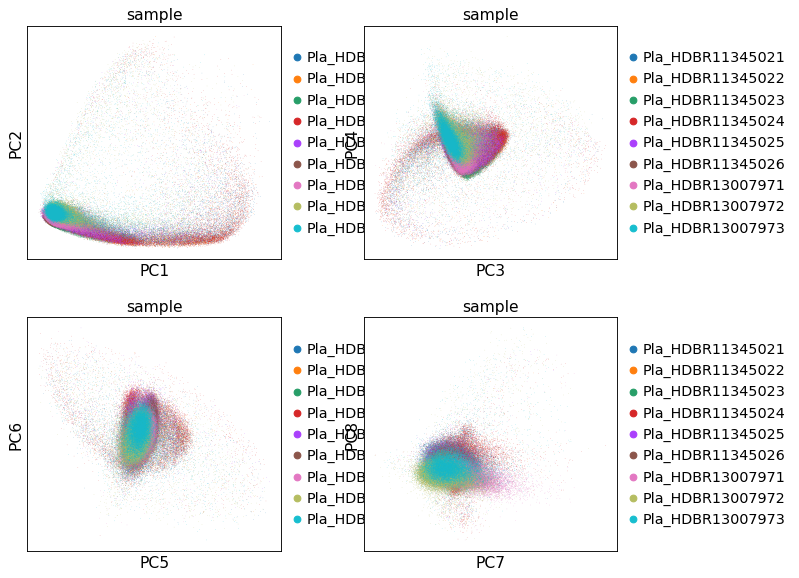

In [17]:
sc.pl.pca(bdata, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)

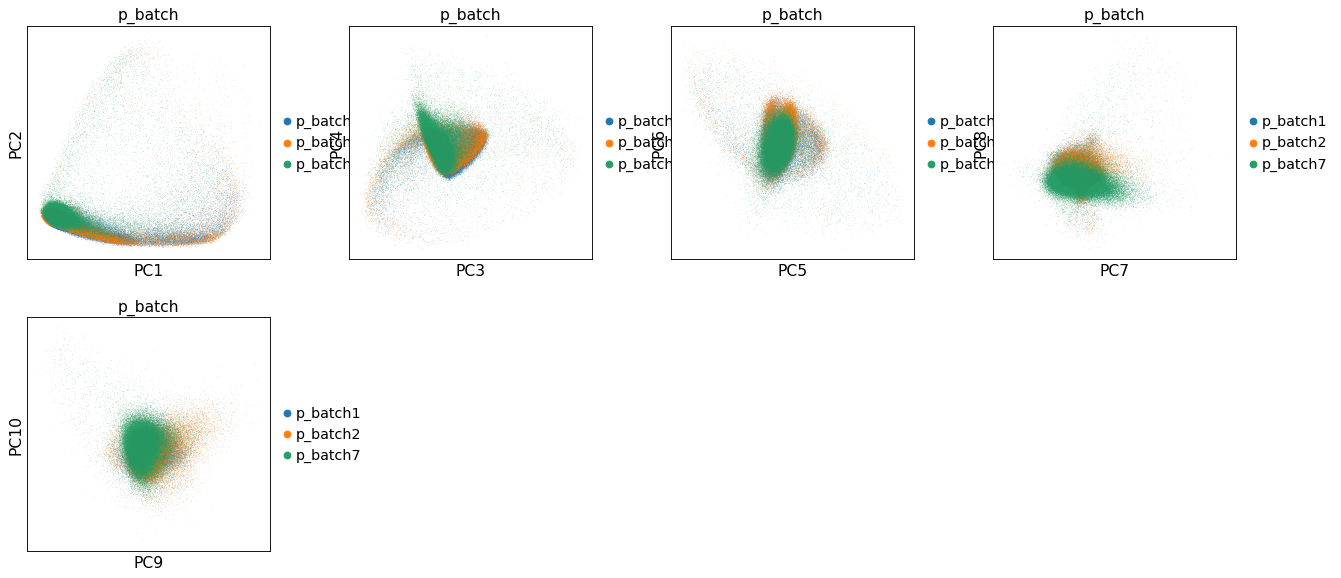

In [18]:
sc.pl.pca(bdata, color='p_batch', components = ['1,2','3,4','5,6','7,8', '9,10'], ncols=4)

**2. Transfer PCA to the main adata**

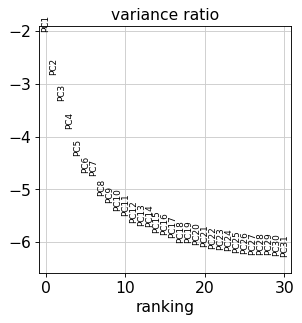

In [19]:
#fill NaNs with False so that subsetting to HVGs is possible
adata.var['highly_variable'].fillna(value=False, inplace=True)
adata.obsm['X_pca'] = bdata.obsm['X_pca'].copy()
adata.uns['pca'] = bdata.uns['pca'].copy()
adata.varm['PCs'] = np.zeros(shape=(adata.n_vars, 50))
adata.varm['PCs'][adata.var['highly_variable']] = bdata.varm['PCs']
sc.pl.pca_variance_ratio(adata, log=True, save='.pdf')

In [20]:
adata

AnnData object with n_obs × n_vars = 205631 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'id_colors', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts'

## UMAP

In [21]:
#n_pcs = 40 exp
#n_pcs = 20 rest
n_pcs = 20
sc.pp.neighbors(adata, n_pcs = n_pcs)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:54)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:37)


In [22]:
palette1=["#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888"]

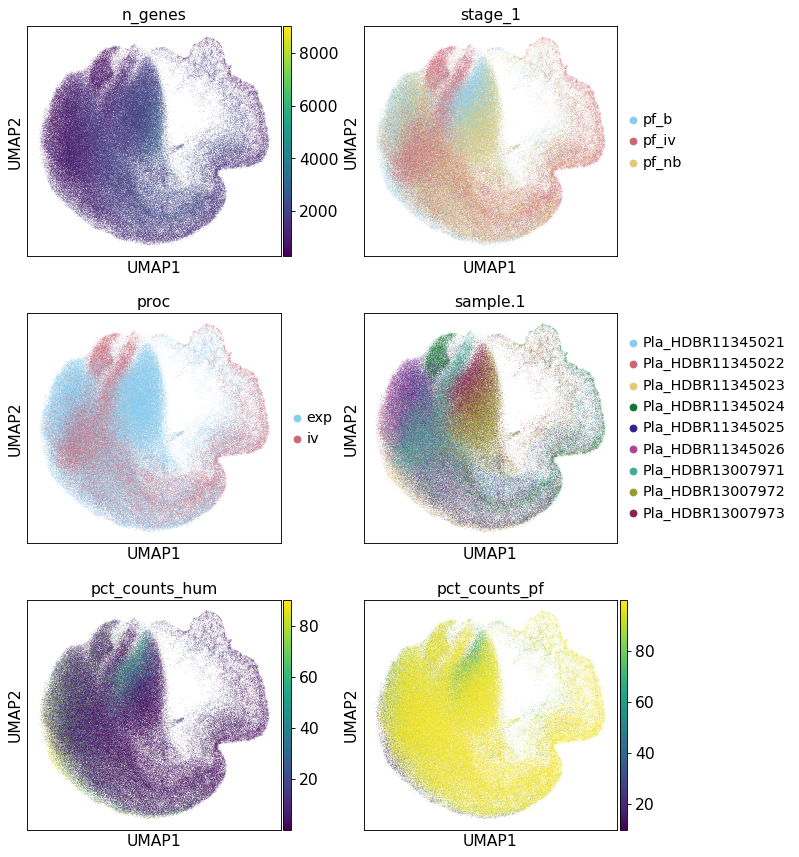

In [23]:
sc.pl.umap(adata, color=['n_genes','stage_1','proc',  'sample.1','pct_counts_hum', 'pct_counts_pf'], 
           palette=palette1, ncols = 2)

In [24]:
adata.obs['is_doublet'].value_counts()

False    203108
True       2523
Name: is_doublet, dtype: int64

In [25]:
adata.obs['is_doublet_0.05'].value_counts()

False    202712
True       2919
Name: is_doublet_0.05, dtype: int64

In [26]:
pf= adata.var.gene_ids.str.startswith('PF3D7')
print(sum(pf))

5515


In [27]:
hum= adata.var.gene_ids.str.startswith('ENSG')
print(sum(hum))

0


normalizing counts per cell
    finished (0:00:02)


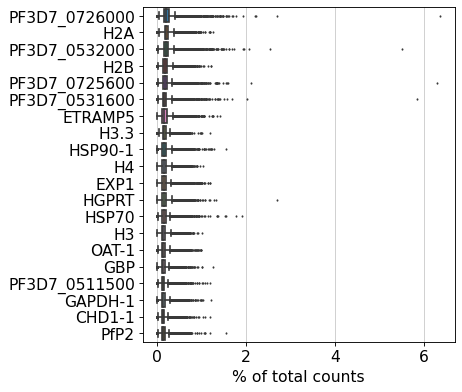

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [29]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['stage_1'].values.describe()

Total number of cells: 205631
Total number of genes: 5515


,counts,freqs
categories,,
pf_b,37755,0.183606
pf_iv,74674,0.363146
pf_nb,93202,0.453249


In [30]:
palette2=['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

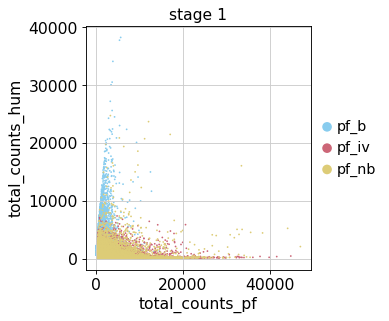

In [31]:
sc.pl.scatter(adata, x='total_counts_pf', y='total_counts_hum', color="stage_1", size=10)

In [32]:
adata

AnnData object with n_obs × n_vars = 205631 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'id_colors', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'distances', 'connectivities'

In [33]:
adata_subset = adata[adata.obs['stage_1'] == 'pf_b']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [34]:
print('Total number of cells: {:d}'.format(adata_subset.n_obs))
print('Total number of genes: {:d}'.format(adata_subset.n_vars))
adata_subset.obs['sample.1'].values.describe()

Total number of cells: 37755
Total number of genes: 5515


,counts,freqs
categories,,
Pla_HDBR11345023,8143,0.215680
Pla_HDBR11345026,11807,0.312727
Pla_HDBR13007973,17805,0.471593


In [35]:
adata.obs.tail()

,sample,stage,id,proc,sample.1,p_batch,percent_mito,n_counts,n_genes,batch,...,S_score,G2M_score,phase,scrublet_score,scrublet_cluster_score,zscore,bh_pval,bonf_pval,is_doublet,is_doublet_0.05
Pla_HDBR13007973_TTTGTTGGTTTCGATG,Pla_HDBR13007973,PfNF54+Hrv170,parasite+host,exp,Pla_HDBR13007973,p_batch7,0.021978,2331.0,1681,11,...,-0.006667,-0.024540,G1,0.049953,0.132890,-0.256656,0.992678,1.0,False,False
Pla_HDBR13007973_TTTGTTGTCCAGCTCT,Pla_HDBR13007973,PfNF54+Hrv170,parasite+host,exp,Pla_HDBR13007973,p_batch7,0.037967,2444.0,1766,11,...,-0.008889,-0.016360,G1,0.022082,0.216486,1.391315,0.733260,1.0,False,False
Pla_HDBR13007973_TTTGTTGTCGCCAACG,Pla_HDBR13007973,PfNF54+Hrv170,parasite+host,exp,Pla_HDBR13007973,p_batch7,0.039859,2722.0,1994,11,...,0.015501,-0.009399,S,0.231156,0.150635,0.093158,0.944431,1.0,False,False
Pla_HDBR13007973_TTTGTTGTCTAGTACG,Pla_HDBR13007973,PfNF54+Hrv170,parasite+host,exp,Pla_HDBR13007973,p_batch7,0.071372,1280.0,1656,11,...,0.024336,-0.000393,S,0.320197,0.175992,0.593027,0.922628,1.0,False,False
Pla_HDBR13007973_TTTGTTGTCTCGAGTA,Pla_HDBR13007973,PfNF54+Hrv170,parasite+host,exp,Pla_HDBR13007973,p_batch7,0.036182,2248.0,1852,11,...,-0.028889,0.022927,G2M,0.273775,0.258242,2.214464,0.395402,1.0,False,False


In [36]:
np.unique(adata.obs['stage_1'], return_counts=True)

(array(['pf_b', 'pf_iv', 'pf_nb'], dtype=object), array([37755, 74674, 93202]))

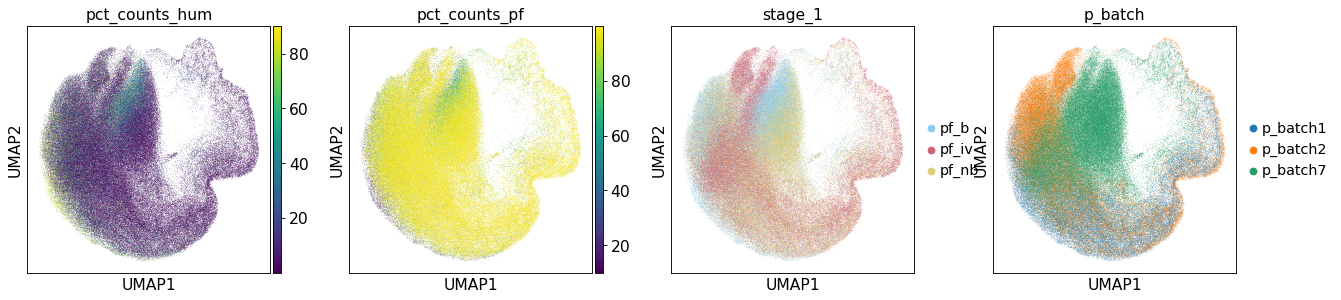

In [37]:
sc.pl.umap(adata, color=['pct_counts_hum', 'pct_counts_pf', 'stage_1','p_batch']) 

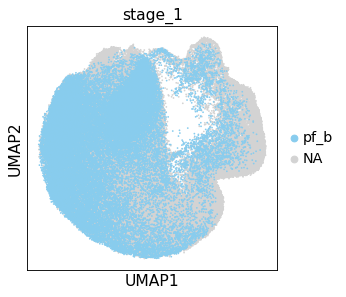

In [38]:
sc.pl.umap(adata, color='stage_1', groups=['pf_b'], size=10)

### Save normalized dataset --> if proceed for Harmony 

In [39]:
#storing raw in layers
adata.write('./output/rna1_counts_Pf_no_hum_Normalized_adata.h5ad')
#adata.write('./output_new/TWO/pS2_preprocessed_two_adata.h5ad')
#adata.write('./output_new/TW-Okae/pS2_preprocessed_tw-okae_adata.h5ad')
#adata.write('./output_new/AO-Okae/pS2_preprocessed_ao-okae_adata.h5ad')

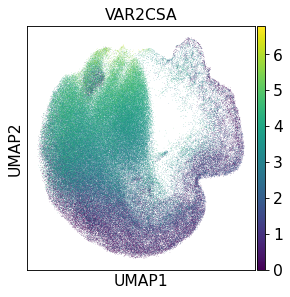

In [42]:
sc.pl.umap(adata, color=['VAR2CSA'],legend_fontsize='xx-small', use_raw=False)

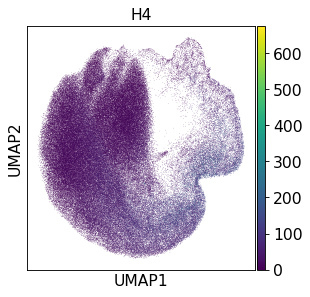

In [41]:
sc.pl.umap(adata, color=['H4'],legend_fontsize='xx-small', layer='raw_counts')